<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(1_6)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_1.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_1.6_n250.csv',
 'data_multi_delta_1.6_n120.csv',
 'data_multi_delta_1.6_n60.csv',
 'data_multi_delta_1.6_n30.csv',
 'data_multi_delta_1.6_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.6_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,30.203197,-23.925063,16.278134,41.127522,-24.849388
1,0.0,1.0,32.335674,-36.512736,5.822938,43.600649,-37.777711
2,0.0,2.0,61.115128,0.101608,71.216736,76.977444,-5.760708
3,0.0,3.0,97.470168,57.816386,165.286554,119.139978,46.146576
4,0.0,4.0,99.663572,-58.711052,50.952521,121.683766,-70.731245
...,...,...,...,...,...,...,...
59995,999.0,55.0,80.906811,-19.461796,71.445015,87.776282,-16.331268
59996,999.0,56.0,30.519684,19.930822,60.450506,40.330650,20.119856
59997,999.0,57.0,65.889738,-23.356579,52.533158,73.635874,-21.102716
59998,999.0,58.0,44.683706,25.410705,80.094412,53.667807,26.426605


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,30.203197,-23.925063,16.278134,41.127522,-24.849388
1,0.0,1.0,32.335674,-36.512736,5.822938,43.600649,-37.777711
2,0.0,2.0,61.115128,0.101608,71.216736,76.977444,-5.760708
3,0.0,3.0,97.470168,57.816386,165.286554,119.139978,46.146576
4,0.0,4.0,99.663572,-58.711052,50.952521,121.683766,-70.731245
...,...,...,...,...,...,...,...
59995,999.0,55.0,80.906811,-19.461796,71.445015,87.776282,-16.331268
59996,999.0,56.0,30.519684,19.930822,60.450506,40.330650,20.119856
59997,999.0,57.0,65.889738,-23.356579,52.533158,73.635874,-21.102716
59998,999.0,58.0,44.683706,25.410705,80.094412,53.667807,26.426605


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    30.203197 -23.925063   16.278134   41.127522 -24.849388
      1.0    32.335674 -36.512736    5.822938   43.600649 -37.777711
      2.0    61.115128   0.101608   71.216736   76.977444  -5.760708
      3.0    97.470168  57.816386  165.286554  119.139978  46.146576
      4.0    99.663572 -58.711052   50.952521  121.683766 -70.731245
...                ...        ...         ...         ...        ...
999.0 55.0   80.906811 -19.461796   71.445015   87.776282 -16.331268
      56.0   30.519684  19.930822   60.450506   40.330650  20.119856
      57.0   65.889738 -23.356579   52.533158   73.635874 -21.102716
      58.0   44.683706  25.410705   80.094412   53.667807  26.426605
      59.0   44.436882  22.763518   77.200400   53.435391  23.765008

[60000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    30.203197 -23.925063   16.278134   41.127522 -24.849388
      1.0    32.335674 -36.512736    5.822938   43.600649 -37.777711
      2.0    61.115128   0.101608   71.216736   76.977444  -5.760708
      3.0    97.470168  57.816386  165.286554  119.139978  46.146576
      4.0    99.663572 -58.711052   50.952521  121.683766 -70.731245
...                ...        ...         ...         ...        ...
999.0 55.0   80.906811 -19.461796   71.445015   87.776282 -16.331268
      56.0   30.519684  19.930822   60.450506   40.330650  20.119856
      57.0   65.889738 -23.356579   52.533158   73.635874 -21.102716
      58.0   44.683706  25.410705   80.094412   53.667807  26.426605
      59.0   44.436882  22.763518   77.200400   53.435391  23.765008

[60000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,30.203197,-23.925063,16.278134,41.127522,-24.849388
1,0.0,1.0,32.335674,-36.512736,5.822938,43.600649,-37.777711
2,0.0,2.0,61.115128,0.101608,71.216736,76.977444,-5.760708
3,0.0,3.0,97.470168,57.816386,165.286554,119.139978,46.146576
4,0.0,4.0,99.663572,-58.711052,50.952521,121.683766,-70.731245
...,...,...,...,...,...,...,...
59995,999.0,55.0,80.906811,-19.461796,71.445015,87.776282,-16.331268
59996,999.0,56.0,30.519684,19.930822,60.450506,40.330650,20.119856
59997,999.0,57.0,65.889738,-23.356579,52.533158,73.635874,-21.102716
59998,999.0,58.0,44.683706,25.410705,80.094412,53.667807,26.426605


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    30.203197 -23.925063   16.278134   41.127522 -24.849388
      1.0    32.335674 -36.512736    5.822938   43.600649 -37.777711
      2.0    61.115128   0.101608   71.216736   76.977444  -5.760708
      3.0    97.470168  57.816386  165.286554  119.139978  46.146576
      4.0    99.663572 -58.711052   50.952521  121.683766 -70.731245
...                ...        ...         ...         ...        ...
999.0 55.0   80.906811 -19.461796   71.445015   87.776282 -16.331268
      56.0   30.519684  19.930822   60.450506   40.330650  20.119856
      57.0   65.889738 -23.356579   52.533158   73.635874 -21.102716
      58.0   44.683706  25.410705   80.094412   53.667807  26.426605
      59.0   44.436882  22.763518   77.200400   53.435391  23.765008

[60000 rows x 5 columns]

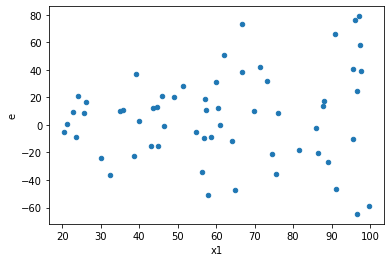

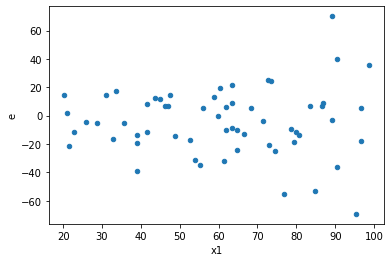

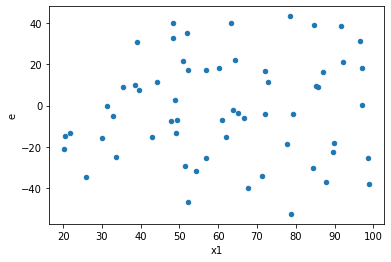

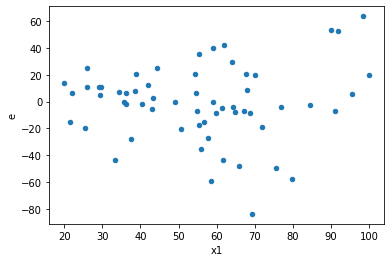

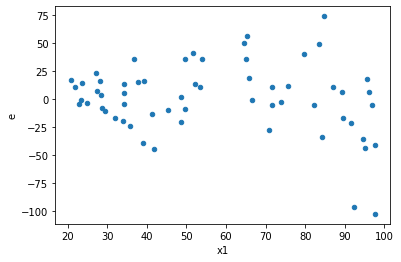

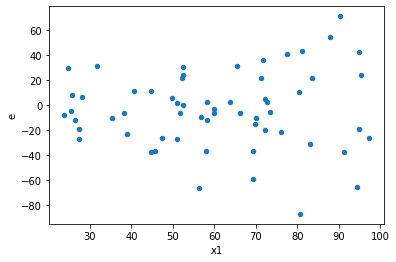

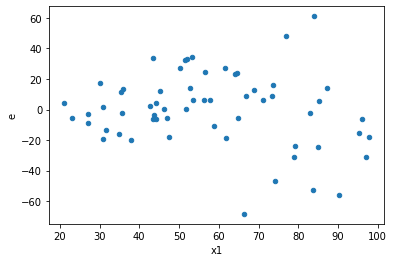

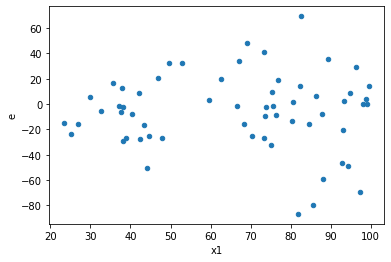

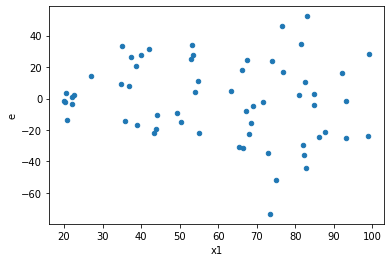

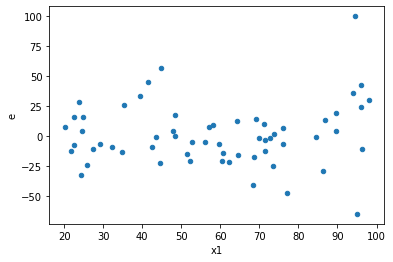

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,23.0,23.0,8550.079611309926,39058.296627993645,371.74259179608373,1698.186809912767,4.568179292310668,0.0005580671151887984,0.9997209664424056,0.0002790335575943992,Reject001=0 : Heteroscedasticity
1.0,23.0,23.0,6173.522267738392,22833.062771527693,268.41401164079963,992.7418596316388,3.6985470824084934,0.0026777276169316355,0.9986611361915342,0.0013388638084658178,Reject001=0 : Heteroscedasticity
2.0,23.0,23.0,7647.265776254116,17958.227702140033,332.4898163588746,780.7925087886971,2.3483200698873277,0.04596027417085935,0.9770198629145703,0.022980137085429675,Reject001=1 : Homoscedasticity
3.0,23.0,23.0,6300.586973988146,26844.21639767947,273.93856408644115,1167.1398433773682,4.260589768620814,0.0009512696426754452,0.9995243651786623,0.0004756348213377226,Reject001=0 : Heteroscedasticity
4.0,23.0,23.0,7430.462147446331,31207.30565109998,323.06357162810133,1356.8393761347818,4.1999144914324305,0.0010596231888297947,0.9994701884055851,0.0005298115944148973,Reject001=0 : Heteroscedasticity
5.0,23.0,23.0,9605.033382562327,36147.78794349496,417.6101470679273,1571.642954064998,3.7634213754134644,0.0023662558118997534,0.9988168720940501,0.0011831279059498767,Reject001=0 : Heteroscedasticity
6.0,23.0,23.0,4267.807590799253,22355.485533810697,185.5568517738806,971.9776319048129,5.238166214898191,0.00018781584562588272,0.9999060920771871,9.390792281294136e-05,Reject001=0 : Heteroscedasticity
7.0,23.0,23.0,9178.98116356465,32923.12724127146,399.0861375462891,1431.4403148378897,3.5867953811646998,0.0033223094217234017,0.9983388452891383,0.0016611547108617009,Reject001=0 : Heteroscedasticity
8.0,23.0,23.0,7411.4747641136455,22688.95430350584,322.23803322233243,986.4762740654713,3.061327876789885,0.009600444858818724,0.9951997775705906,0.004800222429409362,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,23.0,23.0,8550.079611309926,39058.296627993645,371.74259179608373,1698.186809912767,4.568179292310668,0.0005580671151887984,Reject001=0 : Heteroscedasticity
1.0,23.0,23.0,6173.522267738392,22833.062771527693,268.41401164079963,992.7418596316388,3.6985470824084934,0.0026777276169316355,Reject001=0 : Heteroscedasticity
2.0,23.0,23.0,7647.265776254116,17958.227702140033,332.4898163588746,780.7925087886971,2.3483200698873277,0.04596027417085935,Reject001=1 : Homoscedasticity
3.0,23.0,23.0,6300.586973988146,26844.21639767947,273.93856408644115,1167.1398433773682,4.260589768620814,0.0009512696426754452,Reject001=0 : Heteroscedasticity
4.0,23.0,23.0,7430.462147446331,31207.30565109998,323.06357162810133,1356.8393761347818,4.1999144914324305,0.0010596231888297947,Reject001=0 : Heteroscedasticity
5.0,23.0,23.0,9605.033382562327,36147.78794349496,417.6101470679273,1571.642954064998,3.7634213754134644,0.0023662558118997534,Reject001=0 : Heteroscedasticity
6.0,23.0,23.0,4267.807590799253,22355.485533810697,185.5568517738806,971.9776319048129,5.238166214898191,0.00018781584562588272,Reject001=0 : Heteroscedasticity
7.0,23.0,23.0,9178.98116356465,32923.12724127146,399.0861375462891,1431.4403148378897,3.5867953811646998,0.0033223094217234017,Reject001=0 : Heteroscedasticity
8.0,23.0,23.0,7411.4747641136455,22688.95430350584,322.23803322233243,986.4762740654713,3.061327876789885,0.009600444858818724,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    687
Reject001=1 : Homoscedasticity      313
Name: Result_test, dtype: int64